In [11]:
import numpy as np
import csv
import ast
import random

# TASK 1


In [12]:
def generate_legitimate_error():

    legitimate_error_list = []
    with open('dataset/legitimate_channel_error.csv', newline='') as csvfile:
        
        for line in csvfile:
            legitimate_error_list.append(ast.literal_eval(line.strip()))

    legitimate_error_list_clean = [elem[0] if isinstance(elem, tuple) else elem for elem in legitimate_error_list]

    return legitimate_error_list_clean


def generate_eavesdropper_error():

    eavesdropper_error_list = []
    with open('dataset/eavesdropper_channel_error.csv', newline='') as csvfile:
        
        for line in csvfile:
            eavesdropper_error_list.append(ast.literal_eval(line.strip()))

    eavesdropper_error_list_clean = [elem[0] if isinstance(elem, tuple) else elem for elem in eavesdropper_error_list]

    return eavesdropper_error_list_clean

print(generate_eavesdropper_error())



[[0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1], [1, 1, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 1], [0, 1, 1, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 1], [0, 0, 1, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 1, 1, 0, 0], [0, 0, 0, 1, 0, 1, 0], [0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 0, 1, 1], [1, 1, 1, 0, 0, 0, 0], [1, 1, 0, 1, 0, 0, 0], [1, 1, 0, 0, 1, 0, 0], [1, 1, 0, 0, 0, 1, 0], [1, 1, 0, 0, 0, 0, 1], [1, 0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 0, 1, 0], [1, 0, 1, 0, 0, 0, 1], [1, 0, 0, 1, 1, 0, 0], [1, 0, 0, 1, 0, 1, 0], [1, 0, 0, 1, 0, 0, 1], [1, 0, 0, 0, 1, 1, 0], [1, 0, 0, 0, 1, 0, 1], [1, 0, 0, 

In [13]:


def random_gen(n):
    if n <= 0:
        raise ValueError("n needs to be > 0")
    return random.randint(0, n - 1)


In [14]:
def binary_sum(x,y):

    result = []
    reminder = 0

    for i in reversed(range(len(x))):
        sum = x[i]+y[i]+reminder
        bit = sum%2
        reminder = sum // 2
        result.insert(0,bit)
    
    if reminder:
        result.insert(0,reminder)
    
    return result


In [15]:
def xor(x,y): #probabilmente si potrebbe usare numpy
    result = []
    for i in range(len(x)):
        result.append(x[i] ^ y[i])
    return result

In [16]:
def wiretap_channel(input):

    legitimate_error_list = generate_legitimate_error()
    eavesdropper_error_list = generate_eavesdropper_error()
    legitimate_error = legitimate_error_list[random_gen(8)]
    eavesdropper_error = eavesdropper_error_list[random_gen(64)]

    return (xor(input,legitimate_error),xor(input,eavesdropper_error))


x = [0,0,0,0,0,0,0]


In [17]:
def run_wiretap_simulation(input, num_runs=10**4):
    results = {}

    for _ in range(num_runs):
        y, z = wiretap_channel(input)

        # Convertiamo le liste x e y in tuple per una gestione più facile nel dizionario
        y_tuple = tuple(y)
        z_tuple = tuple(z)

        if (y_tuple, z_tuple) not in results:
            results[(y_tuple, z_tuple)] = 0
        results[(y_tuple, z_tuple)] += 1

    # Calcoliamo le probabilità
    probabilities = {key: count / num_runs for key, count in results.items()}
    
    return probabilities

# Funzione per dividere le probabilità per x e y
def divide_probabilities(probabilities):
    y_probabilities = {}
    z_probabilities = {}

    # Dividiamo le probabilità
    for (y, z), prob in probabilities.items():
        if y not in y_probabilities:
            y_probabilities[y] = 0
        if z not in z_probabilities:
            z_probabilities[z] = 0
        
        y_probabilities[y] += prob
        z_probabilities[z] += prob

    # Ordinamento delle probabilità
    y_probabilities = dict(sorted(y_probabilities.items()))
    z_probabilities = dict(sorted(z_probabilities.items()))

    return y_probabilities, z_probabilities




In [18]:
probabilities = run_wiretap_simulation(x)
x_probabilities, y_probabilities = divide_probabilities(probabilities)

In [19]:
# Stampa le probabilità ordinate per x e y
print("Probabilità per y:")
for x_val, joint_prob in x_probabilities.items():
    print(f"x = {x_val} : {joint_prob:.6f}")

print("\nProbabilità per z:")
for y_val, joint_prob in y_probabilities.items():
    print(f"y = {y_val} : {joint_prob:.6f}")

Probabilità per y:
x = (0, 0, 0, 0, 0, 0, 0) : 0.124800
x = (0, 0, 0, 0, 0, 0, 1) : 0.123700
x = (0, 0, 0, 0, 0, 1, 0) : 0.120000
x = (0, 0, 0, 0, 1, 0, 0) : 0.125000
x = (0, 0, 0, 1, 0, 0, 0) : 0.130200
x = (0, 0, 1, 0, 0, 0, 0) : 0.121700
x = (0, 1, 0, 0, 0, 0, 0) : 0.126800
x = (1, 0, 0, 0, 0, 0, 0) : 0.127800

Probabilità per z:
y = (0, 0, 0, 0, 0, 0, 0) : 0.013800
y = (0, 0, 0, 0, 0, 0, 1) : 0.014900
y = (0, 0, 0, 0, 0, 1, 0) : 0.016800
y = (0, 0, 0, 0, 0, 1, 1) : 0.015500
y = (0, 0, 0, 0, 1, 0, 0) : 0.018100
y = (0, 0, 0, 0, 1, 0, 1) : 0.014900
y = (0, 0, 0, 0, 1, 1, 0) : 0.017000
y = (0, 0, 0, 0, 1, 1, 1) : 0.013200
y = (0, 0, 0, 1, 0, 0, 0) : 0.013800
y = (0, 0, 0, 1, 0, 0, 1) : 0.018800
y = (0, 0, 0, 1, 0, 1, 0) : 0.015300
y = (0, 0, 0, 1, 0, 1, 1) : 0.017800
y = (0, 0, 0, 1, 1, 0, 0) : 0.015200
y = (0, 0, 0, 1, 1, 0, 1) : 0.014400
y = (0, 0, 0, 1, 1, 1, 0) : 0.015000
y = (0, 0, 1, 0, 0, 0, 0) : 0.015900
y = (0, 0, 1, 0, 0, 0, 1) : 0.017700
y = (0, 0, 1, 0, 0, 1, 0) : 0.014500

# Task 2

In [20]:
H_C = [[0,0,0,0,0,0,0],[0,1,0,0,1,0,1], [0,0,1,0,0,1,1], [0,0,0,1,1,1,1], [0,1,1,0,1,1,0], [0,1,0,1,0,1,0], [0,0,1,1,1,0,0], [0,1,1,1,0,0,1]]


def binary_complement(codeword):

    complement = []
    for i in range (len(codeword)):
        if(codeword[i]==1):
            complement.append(0)
        else:
            complement.append(1)
    return complement

def random_binning_encoder(u):
    mask = [1 for _ in range(7)]
    x = None

    for x in H_C:
        if x[1:4] == u:
            if random.randint(0, 1) == 1:
                x = xor(x, mask)    #calcolca il complemento
            break   
    return x

In [21]:
import itertools


all_messages = [list(vector) for vector in itertools.product([0, 1], repeat=3)]

for m in all_messages:
    print(f"Messaggio: {m}")
    x = random_binning_encoder(m)
    print(f"Codifica: {x}")

Messaggio: [0, 0, 0]
Codifica: [0, 0, 0, 0, 0, 0, 0]
Messaggio: [0, 0, 1]
Codifica: [0, 0, 0, 1, 1, 1, 1]
Messaggio: [0, 1, 0]
Codifica: [1, 1, 0, 1, 1, 0, 0]
Messaggio: [0, 1, 1]
Codifica: [1, 1, 0, 0, 0, 1, 1]
Messaggio: [1, 0, 0]
Codifica: [0, 1, 0, 0, 1, 0, 1]
Messaggio: [1, 0, 1]
Codifica: [1, 0, 1, 0, 1, 0, 1]
Messaggio: [1, 1, 0]
Codifica: [0, 1, 1, 0, 1, 1, 0]
Messaggio: [1, 1, 1]
Codifica: [0, 1, 1, 1, 0, 0, 1]


# Task 3

In [91]:
def hamming_distance(x,y):
    if len(x) != len(y):
        raise ValueError("Le liste devono avere la stessa lunghezza")
    return sum(el_x != el_y for el_x, el_y in zip(x, y))


def random_binning_decoder(y):
    h_c = H_C + [xor([1,1,1,1,1,1,1],x) for x in H_C]
    distances = [hamming_distance(y, x) for x in h_c]
    min_index = distances.index(min(distances))

    x = h_c[min_index]
    if x[0] == 1:
        u = xor(x[1:4], [1,1,1])
    else:
        u = x[1:4]
    return u

In [92]:
all_messages = [list(vector) for vector in itertools.product([0, 1], repeat=3)]

for m in all_messages:
    print(f"Messaggio: {m}")
    x = random_binning_encoder(m)
    print(f"Codifica: {x}")

    u = random_binning_decoder(x)
    print(f"Decodifica: {u}")
    print("-----")

Messaggio: [0, 0, 0]
Codifica: [1, 1, 1, 1, 1, 1, 1]
Decodifica: [0, 0, 0]
-----
Messaggio: [0, 0, 1]
Codifica: [0, 0, 0, 1, 1, 1, 1]
Decodifica: [0, 0, 1]
-----
Messaggio: [0, 1, 0]
Codifica: [0, 0, 1, 0, 0, 1, 1]
Decodifica: [0, 1, 0]
-----
Messaggio: [0, 1, 1]
Codifica: [0, 0, 1, 1, 1, 0, 0]
Decodifica: [0, 1, 1]
-----
Messaggio: [1, 0, 0]
Codifica: [0, 1, 0, 0, 1, 0, 1]
Decodifica: [1, 0, 0]
-----
Messaggio: [1, 0, 1]
Codifica: [0, 1, 0, 1, 0, 1, 0]
Decodifica: [1, 0, 1]
-----
Messaggio: [1, 1, 0]
Codifica: [1, 0, 0, 1, 0, 0, 1]
Decodifica: [1, 1, 0]
-----
Messaggio: [1, 1, 1]
Codifica: [0, 1, 1, 1, 0, 0, 1]
Decodifica: [1, 1, 1]
-----


In [93]:
all_messages = [list(vector) for vector in itertools.product([0, 1], repeat=3)]

for m in all_messages:
    print(f"Messaggio: {m}")
    x = random_binning_encoder(m)
    print(f"Codifica: {x}")
    y, _ = wiretap_channel(x)
    print(f"Canale legittimo: {y}")

    u = random_binning_decoder(y)
    print(f"Decodifica: {u}")
    print("-----")

Messaggio: [0, 0, 0]
Codifica: [0, 0, 0, 0, 0, 0, 0]
Canale legittimo: [0, 0, 0, 1, 0, 0, 0]
Decodifica: [0, 0, 0]
-----
Messaggio: [0, 0, 1]
Codifica: [1, 1, 1, 0, 0, 0, 0]
Canale legittimo: [1, 1, 0, 0, 0, 0, 0]
Decodifica: [0, 0, 1]
-----
Messaggio: [0, 1, 0]
Codifica: [1, 1, 0, 1, 1, 0, 0]
Canale legittimo: [1, 1, 0, 1, 1, 0, 0]
Decodifica: [0, 1, 0]
-----
Messaggio: [0, 1, 1]
Codifica: [1, 1, 0, 0, 0, 1, 1]
Canale legittimo: [1, 1, 0, 0, 0, 0, 1]
Decodifica: [0, 1, 1]
-----
Messaggio: [1, 0, 0]
Codifica: [0, 1, 0, 0, 1, 0, 1]
Canale legittimo: [1, 1, 0, 0, 1, 0, 1]
Decodifica: [1, 0, 0]
-----
Messaggio: [1, 0, 1]
Codifica: [1, 0, 1, 0, 1, 0, 1]
Canale legittimo: [1, 0, 1, 1, 1, 0, 1]
Decodifica: [1, 0, 1]
-----
Messaggio: [1, 1, 0]
Codifica: [1, 0, 0, 1, 0, 0, 1]
Canale legittimo: [1, 0, 0, 0, 0, 0, 1]
Decodifica: [1, 1, 0]
-----
Messaggio: [1, 1, 1]
Codifica: [1, 0, 0, 0, 1, 1, 0]
Canale legittimo: [1, 0, 0, 0, 0, 1, 0]
Decodifica: [1, 1, 1]
-----


# Task 4

In [16]:
import matplotlib.pyplot as plt

def eavesdropper_channel(u):
    x = random_binning_encoder(u)
    _, z = wiretap_channel(x)
    return z


def gen_eavesdropper_data(n_sample):
    all_messages = [list(vector) for vector in itertools.product([0, 1], repeat=3)]
    dist = {}
    
    for u in all_messages:
        zetas = {}
        for _ in range(n_sample):
            z = eavesdropper_channel(u)
            if tuple(z) not in zetas:
                zetas[tuple(z)] = 0
            zetas[tuple(z)] += 1
        probabilities = {key: count / n_sample for key, count in zetas.items()}
        dist[tuple(u)] = probabilities


    return dist


In [17]:
dist = gen_eavesdropper_data(100*(2**7))
print("Probabilità per di zeta | u:")
for u, probabilities in dist.items():
    print(f"u = {u} : {probabilities}\n")

Probabilità per di zeta | u:
u = (0, 0, 0) : {(1, 0, 1, 0, 0, 1, 1): 0.00703125, (0, 1, 1, 1, 0, 0, 1): 0.008046875, (1, 1, 0, 0, 1, 0, 1): 0.00796875, (0, 0, 1, 1, 0, 1, 1): 0.007734375, (0, 0, 1, 0, 0, 1, 0): 0.00765625, (0, 0, 0, 1, 0, 0, 0): 0.006328125, (0, 1, 1, 1, 1, 1, 0): 0.007578125, (0, 0, 0, 1, 1, 0, 0): 0.0084375, (0, 0, 0, 1, 1, 1, 0): 0.007890625, (0, 0, 0, 0, 1, 0, 1): 0.007734375, (1, 1, 1, 0, 0, 0, 1): 0.00703125, (1, 0, 1, 0, 0, 1, 0): 0.0065625, (0, 0, 1, 1, 1, 0, 1): 0.007734375, (0, 1, 1, 0, 0, 0, 1): 0.007734375, (1, 1, 1, 0, 1, 1, 0): 0.009453125, (0, 0, 0, 0, 0, 1, 1): 0.00828125, (1, 1, 0, 0, 1, 0, 0): 0.00796875, (1, 0, 1, 1, 1, 1, 0): 0.00578125, (1, 1, 1, 0, 0, 0, 0): 0.008359375, (0, 1, 1, 0, 1, 1, 0): 0.0075, (0, 1, 1, 1, 1, 0, 1): 0.008203125, (1, 1, 1, 1, 0, 0, 0): 0.00875, (1, 1, 1, 0, 0, 1, 0): 0.007421875, (1, 1, 1, 0, 1, 0, 1): 0.00859375, (1, 1, 0, 1, 1, 0, 1): 0.00796875, (1, 0, 0, 1, 1, 0, 0): 0.008671875, (1, 0, 0, 0, 0, 1, 1): 0.00640625, (0, 0

In [ ]:
z_dist = {}
zetas = [list(array) for array in itertools.product([0, 1], repeat=7)]

p_u = 1/8 #has to be uniform to allow z_dist sum to 1

for z in zetas:
    for u, cond_prob in dist.items():
        if tuple(z) not in z_dist:
            z_dist[tuple(z)] = 0
        z_dist[tuple(z)] += cond_prob[tuple(z)] * p_u

print("Probabilità per zeta:")
for z, joint_prob in z_dist.items():
    print(f"z = {z} : {joint_prob:.6f}")

Probabilità per zeta:
z = (0, 0, 0, 0, 0, 0, 0) : 0.007773
z = (0, 0, 0, 0, 0, 0, 1) : 0.007793
z = (0, 0, 0, 0, 0, 1, 0) : 0.007754
z = (0, 0, 0, 0, 0, 1, 1) : 0.007744
z = (0, 0, 0, 0, 1, 0, 0) : 0.007773
z = (0, 0, 0, 0, 1, 0, 1) : 0.007979
z = (0, 0, 0, 0, 1, 1, 0) : 0.007275
z = (0, 0, 0, 0, 1, 1, 1) : 0.007637
z = (0, 0, 0, 1, 0, 0, 0) : 0.007930
z = (0, 0, 0, 1, 0, 0, 1) : 0.007744
z = (0, 0, 0, 1, 0, 1, 0) : 0.007627
z = (0, 0, 0, 1, 0, 1, 1) : 0.007861
z = (0, 0, 0, 1, 1, 0, 0) : 0.007939
z = (0, 0, 0, 1, 1, 0, 1) : 0.007598
z = (0, 0, 0, 1, 1, 1, 0) : 0.007617
z = (0, 0, 0, 1, 1, 1, 1) : 0.007480
z = (0, 0, 1, 0, 0, 0, 0) : 0.007715
z = (0, 0, 1, 0, 0, 0, 1) : 0.008057
z = (0, 0, 1, 0, 0, 1, 0) : 0.007725
z = (0, 0, 1, 0, 0, 1, 1) : 0.008047
z = (0, 0, 1, 0, 1, 0, 0) : 0.007979
z = (0, 0, 1, 0, 1, 0, 1) : 0.008389
z = (0, 0, 1, 0, 1, 1, 0) : 0.007988
z = (0, 0, 1, 0, 1, 1, 1) : 0.007793
z = (0, 0, 1, 1, 0, 0, 0) : 0.007549
z = (0, 0, 1, 1, 0, 0, 1) : 0.007949
z = (0, 0, 1, 1,

In [ ]:
sum = 0
for z, joint_prob in z_dist.items():
    sum += joint_prob
print(f"Somma delle probabilità: {sum:.6f}")

Somma delle probabilità: 1.000000


In [20]:
def plot_conditional_distribution(dist, u):
    #sort to have all equal plots
    dist[u] = dict(sorted(dist[u].items(), key=lambda item: item[0]))
    print('dist:', dist)

    #split keys and values
    z_values = list(dist[u].keys())
    probabilities = list(dist[u].values())

    print('z_values:', z_values)
    print('probabilities:', probabilities)
    
    plt.figure(figsize=(21, 9))
    plt.bar(range(len(z_values)), probabilities, tick_label=[int(''.join(map(str, value)),2) for value in z_values])
    plt.xticks(rotation=90, ha="right")
    plt.xlabel("z (base 10)")
    plt.ylabel("P(z | u)")
    plt.title(f"Conditional Distribution of z given u = {u}")
    plt.ylim(0.000, 0.012) #fix y axis to have always the same scale
    plt.show()

dist: {(0, 0, 0): {(0, 0, 0, 0, 0, 0, 0): 0.0071875, (0, 0, 0, 0, 0, 0, 1): 0.00828125, (0, 0, 0, 0, 0, 1, 0): 0.008515625, (0, 0, 0, 0, 0, 1, 1): 0.00828125, (0, 0, 0, 0, 1, 0, 0): 0.008125, (0, 0, 0, 0, 1, 0, 1): 0.007734375, (0, 0, 0, 0, 1, 1, 0): 0.00703125, (0, 0, 0, 0, 1, 1, 1): 0.006484375, (0, 0, 0, 1, 0, 0, 0): 0.006328125, (0, 0, 0, 1, 0, 0, 1): 0.007421875, (0, 0, 0, 1, 0, 1, 0): 0.007421875, (0, 0, 0, 1, 0, 1, 1): 0.0078125, (0, 0, 0, 1, 1, 0, 0): 0.0084375, (0, 0, 0, 1, 1, 0, 1): 0.00765625, (0, 0, 0, 1, 1, 1, 0): 0.007890625, (0, 0, 0, 1, 1, 1, 1): 0.006953125, (0, 0, 1, 0, 0, 0, 0): 0.007734375, (0, 0, 1, 0, 0, 0, 1): 0.0071875, (0, 0, 1, 0, 0, 1, 0): 0.00765625, (0, 0, 1, 0, 0, 1, 1): 0.0090625, (0, 0, 1, 0, 1, 0, 0): 0.006953125, (0, 0, 1, 0, 1, 0, 1): 0.009140625, (0, 0, 1, 0, 1, 1, 0): 0.00734375, (0, 0, 1, 0, 1, 1, 1): 0.00765625, (0, 0, 1, 1, 0, 0, 0): 0.008125, (0, 0, 1, 1, 0, 0, 1): 0.00875, (0, 0, 1, 1, 0, 1, 0): 0.00765625, (0, 0, 1, 1, 0, 1, 1): 0.007734375, (

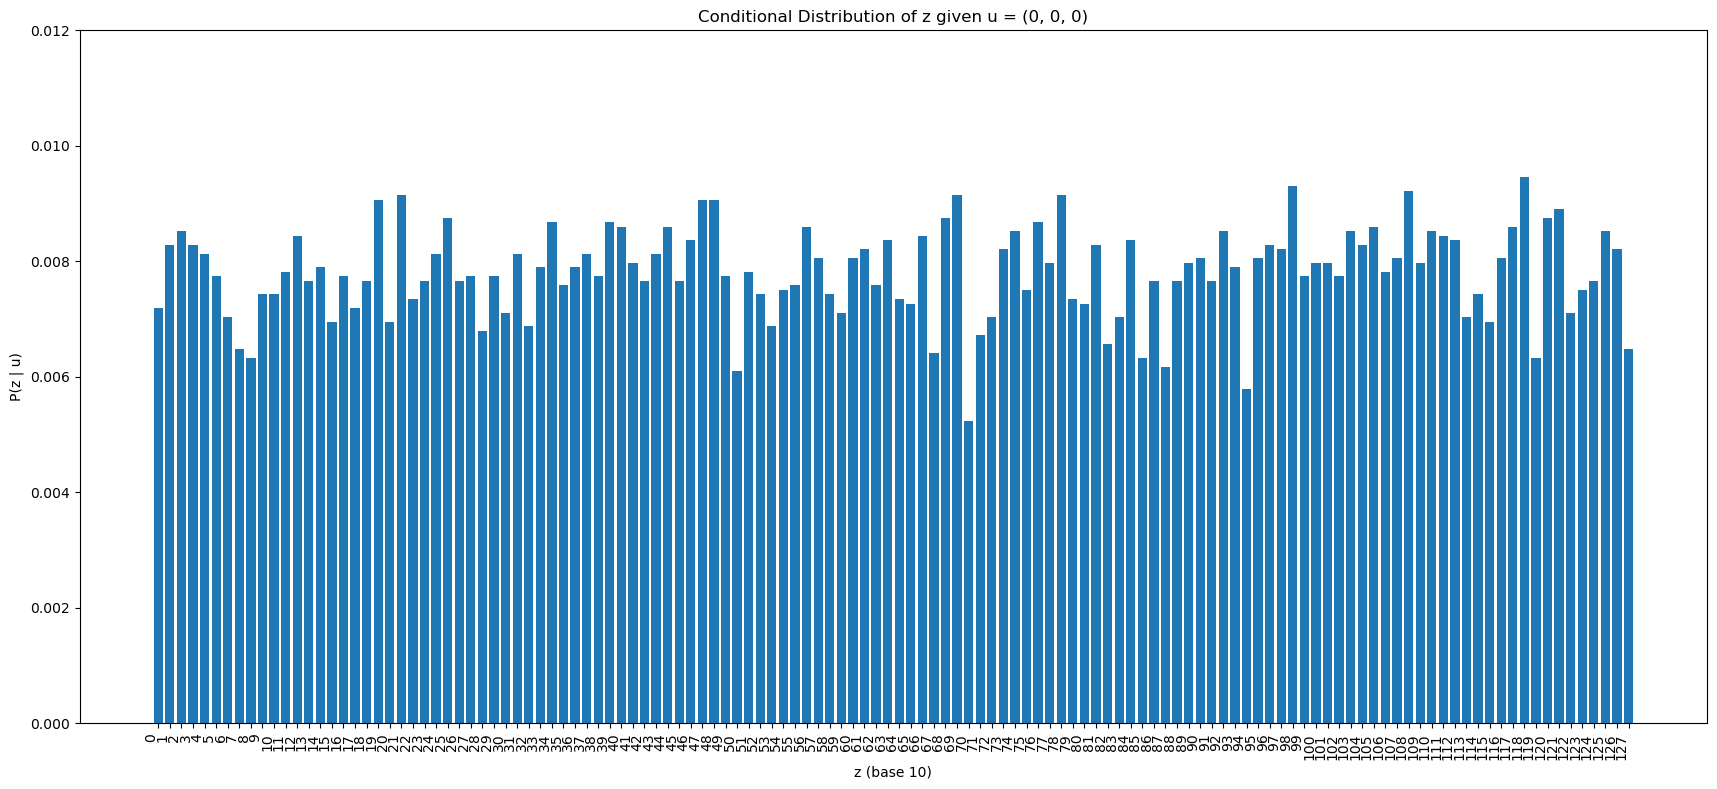

dist: {(0, 0, 0): {(0, 0, 0, 0, 0, 0, 0): 0.0071875, (0, 0, 0, 0, 0, 0, 1): 0.00828125, (0, 0, 0, 0, 0, 1, 0): 0.008515625, (0, 0, 0, 0, 0, 1, 1): 0.00828125, (0, 0, 0, 0, 1, 0, 0): 0.008125, (0, 0, 0, 0, 1, 0, 1): 0.007734375, (0, 0, 0, 0, 1, 1, 0): 0.00703125, (0, 0, 0, 0, 1, 1, 1): 0.006484375, (0, 0, 0, 1, 0, 0, 0): 0.006328125, (0, 0, 0, 1, 0, 0, 1): 0.007421875, (0, 0, 0, 1, 0, 1, 0): 0.007421875, (0, 0, 0, 1, 0, 1, 1): 0.0078125, (0, 0, 0, 1, 1, 0, 0): 0.0084375, (0, 0, 0, 1, 1, 0, 1): 0.00765625, (0, 0, 0, 1, 1, 1, 0): 0.007890625, (0, 0, 0, 1, 1, 1, 1): 0.006953125, (0, 0, 1, 0, 0, 0, 0): 0.007734375, (0, 0, 1, 0, 0, 0, 1): 0.0071875, (0, 0, 1, 0, 0, 1, 0): 0.00765625, (0, 0, 1, 0, 0, 1, 1): 0.0090625, (0, 0, 1, 0, 1, 0, 0): 0.006953125, (0, 0, 1, 0, 1, 0, 1): 0.009140625, (0, 0, 1, 0, 1, 1, 0): 0.00734375, (0, 0, 1, 0, 1, 1, 1): 0.00765625, (0, 0, 1, 1, 0, 0, 0): 0.008125, (0, 0, 1, 1, 0, 0, 1): 0.00875, (0, 0, 1, 1, 0, 1, 0): 0.00765625, (0, 0, 1, 1, 0, 1, 1): 0.007734375, (

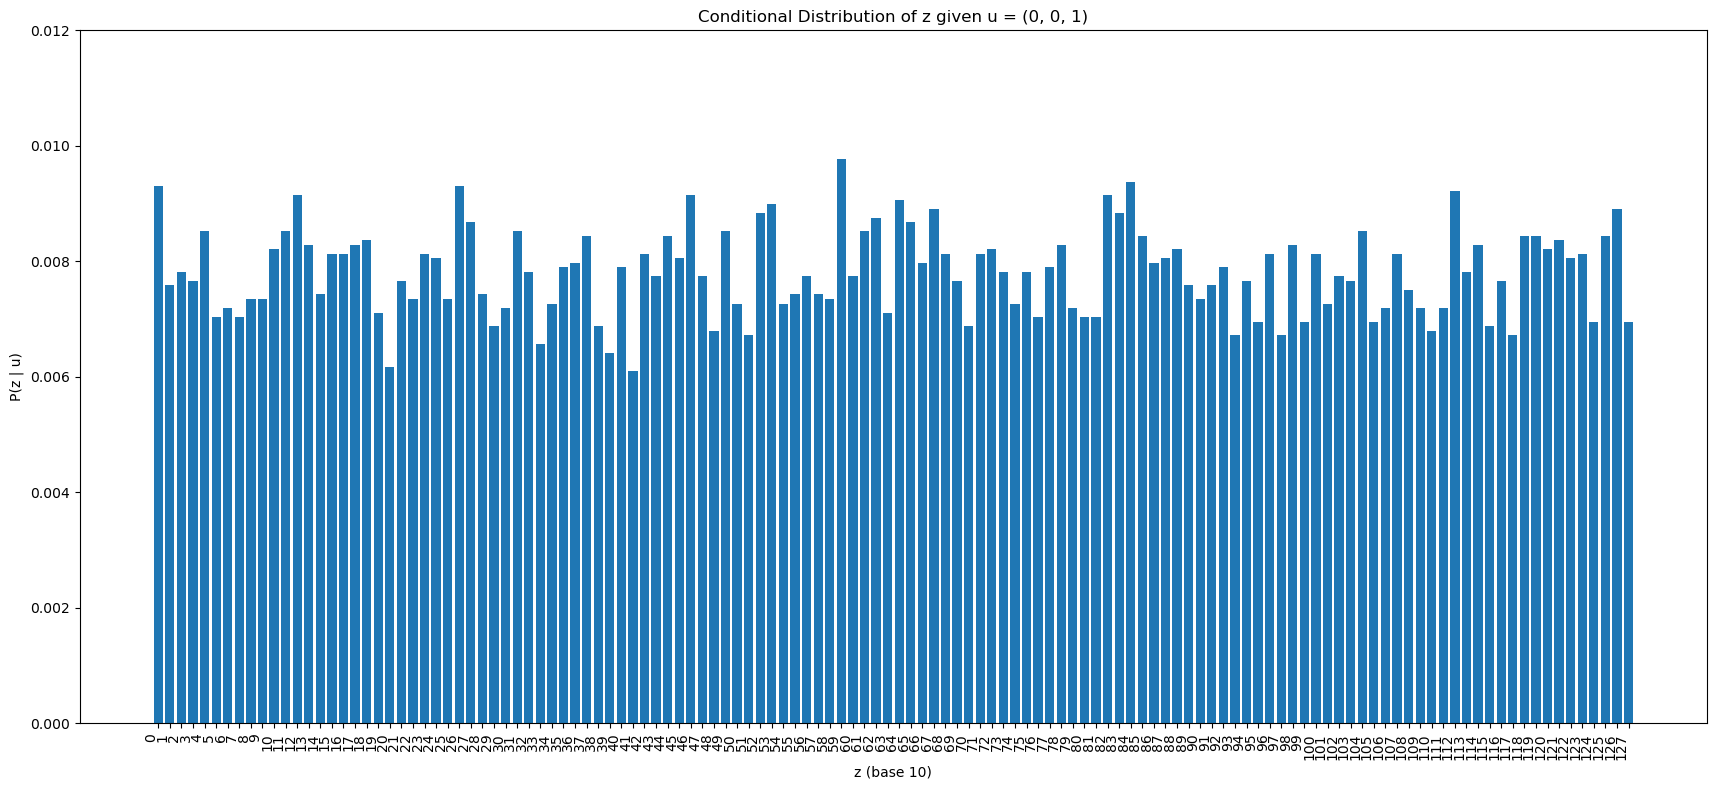

dist: {(0, 0, 0): {(0, 0, 0, 0, 0, 0, 0): 0.0071875, (0, 0, 0, 0, 0, 0, 1): 0.00828125, (0, 0, 0, 0, 0, 1, 0): 0.008515625, (0, 0, 0, 0, 0, 1, 1): 0.00828125, (0, 0, 0, 0, 1, 0, 0): 0.008125, (0, 0, 0, 0, 1, 0, 1): 0.007734375, (0, 0, 0, 0, 1, 1, 0): 0.00703125, (0, 0, 0, 0, 1, 1, 1): 0.006484375, (0, 0, 0, 1, 0, 0, 0): 0.006328125, (0, 0, 0, 1, 0, 0, 1): 0.007421875, (0, 0, 0, 1, 0, 1, 0): 0.007421875, (0, 0, 0, 1, 0, 1, 1): 0.0078125, (0, 0, 0, 1, 1, 0, 0): 0.0084375, (0, 0, 0, 1, 1, 0, 1): 0.00765625, (0, 0, 0, 1, 1, 1, 0): 0.007890625, (0, 0, 0, 1, 1, 1, 1): 0.006953125, (0, 0, 1, 0, 0, 0, 0): 0.007734375, (0, 0, 1, 0, 0, 0, 1): 0.0071875, (0, 0, 1, 0, 0, 1, 0): 0.00765625, (0, 0, 1, 0, 0, 1, 1): 0.0090625, (0, 0, 1, 0, 1, 0, 0): 0.006953125, (0, 0, 1, 0, 1, 0, 1): 0.009140625, (0, 0, 1, 0, 1, 1, 0): 0.00734375, (0, 0, 1, 0, 1, 1, 1): 0.00765625, (0, 0, 1, 1, 0, 0, 0): 0.008125, (0, 0, 1, 1, 0, 0, 1): 0.00875, (0, 0, 1, 1, 0, 1, 0): 0.00765625, (0, 0, 1, 1, 0, 1, 1): 0.007734375, (

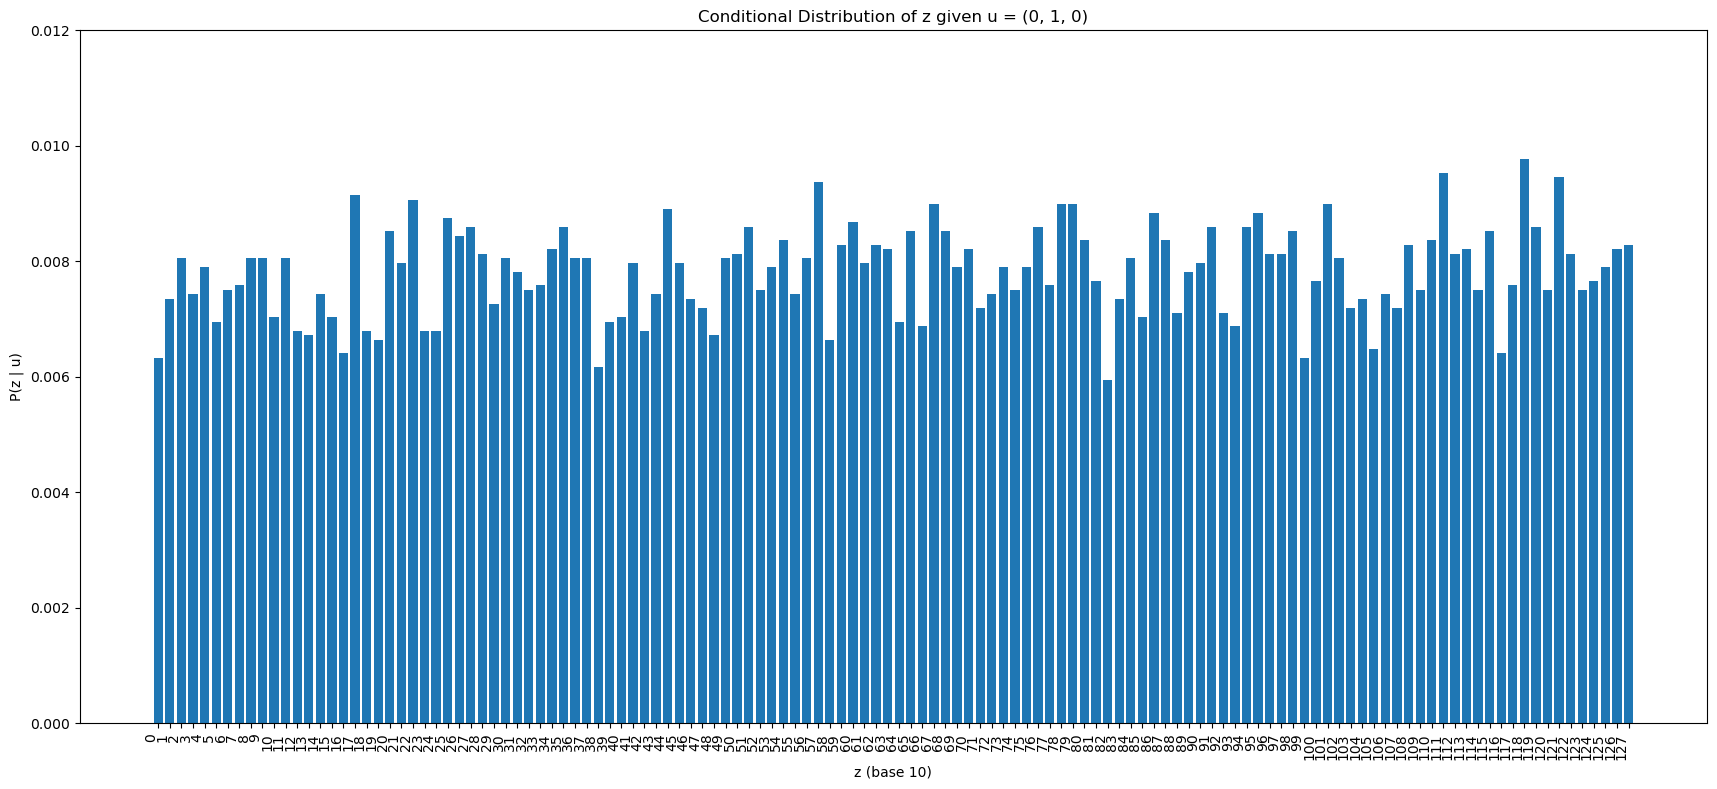

dist: {(0, 0, 0): {(0, 0, 0, 0, 0, 0, 0): 0.0071875, (0, 0, 0, 0, 0, 0, 1): 0.00828125, (0, 0, 0, 0, 0, 1, 0): 0.008515625, (0, 0, 0, 0, 0, 1, 1): 0.00828125, (0, 0, 0, 0, 1, 0, 0): 0.008125, (0, 0, 0, 0, 1, 0, 1): 0.007734375, (0, 0, 0, 0, 1, 1, 0): 0.00703125, (0, 0, 0, 0, 1, 1, 1): 0.006484375, (0, 0, 0, 1, 0, 0, 0): 0.006328125, (0, 0, 0, 1, 0, 0, 1): 0.007421875, (0, 0, 0, 1, 0, 1, 0): 0.007421875, (0, 0, 0, 1, 0, 1, 1): 0.0078125, (0, 0, 0, 1, 1, 0, 0): 0.0084375, (0, 0, 0, 1, 1, 0, 1): 0.00765625, (0, 0, 0, 1, 1, 1, 0): 0.007890625, (0, 0, 0, 1, 1, 1, 1): 0.006953125, (0, 0, 1, 0, 0, 0, 0): 0.007734375, (0, 0, 1, 0, 0, 0, 1): 0.0071875, (0, 0, 1, 0, 0, 1, 0): 0.00765625, (0, 0, 1, 0, 0, 1, 1): 0.0090625, (0, 0, 1, 0, 1, 0, 0): 0.006953125, (0, 0, 1, 0, 1, 0, 1): 0.009140625, (0, 0, 1, 0, 1, 1, 0): 0.00734375, (0, 0, 1, 0, 1, 1, 1): 0.00765625, (0, 0, 1, 1, 0, 0, 0): 0.008125, (0, 0, 1, 1, 0, 0, 1): 0.00875, (0, 0, 1, 1, 0, 1, 0): 0.00765625, (0, 0, 1, 1, 0, 1, 1): 0.007734375, (

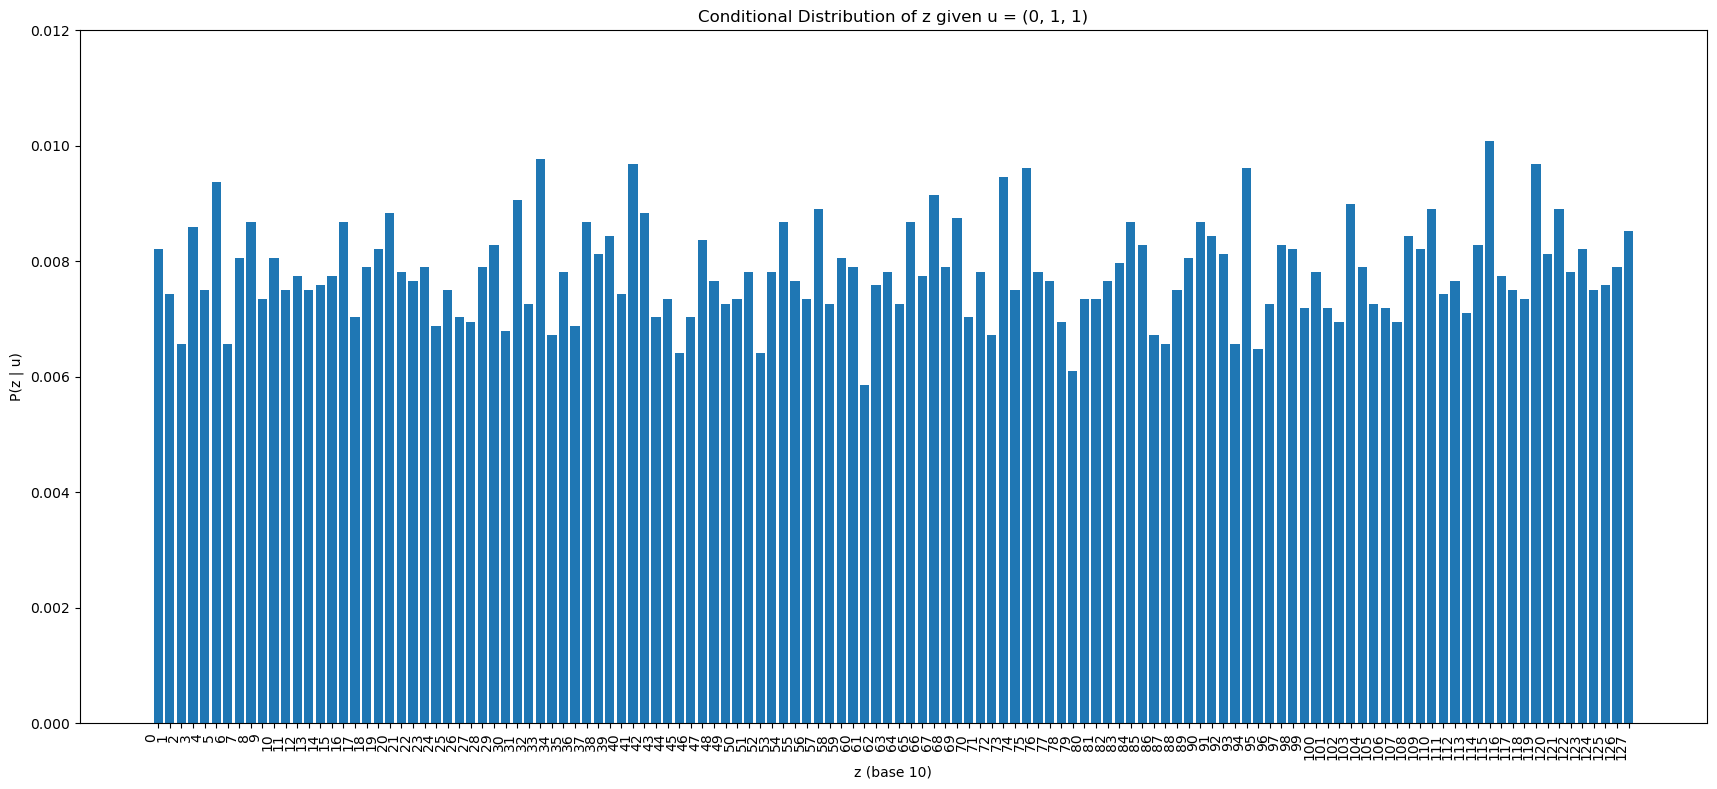

dist: {(0, 0, 0): {(0, 0, 0, 0, 0, 0, 0): 0.0071875, (0, 0, 0, 0, 0, 0, 1): 0.00828125, (0, 0, 0, 0, 0, 1, 0): 0.008515625, (0, 0, 0, 0, 0, 1, 1): 0.00828125, (0, 0, 0, 0, 1, 0, 0): 0.008125, (0, 0, 0, 0, 1, 0, 1): 0.007734375, (0, 0, 0, 0, 1, 1, 0): 0.00703125, (0, 0, 0, 0, 1, 1, 1): 0.006484375, (0, 0, 0, 1, 0, 0, 0): 0.006328125, (0, 0, 0, 1, 0, 0, 1): 0.007421875, (0, 0, 0, 1, 0, 1, 0): 0.007421875, (0, 0, 0, 1, 0, 1, 1): 0.0078125, (0, 0, 0, 1, 1, 0, 0): 0.0084375, (0, 0, 0, 1, 1, 0, 1): 0.00765625, (0, 0, 0, 1, 1, 1, 0): 0.007890625, (0, 0, 0, 1, 1, 1, 1): 0.006953125, (0, 0, 1, 0, 0, 0, 0): 0.007734375, (0, 0, 1, 0, 0, 0, 1): 0.0071875, (0, 0, 1, 0, 0, 1, 0): 0.00765625, (0, 0, 1, 0, 0, 1, 1): 0.0090625, (0, 0, 1, 0, 1, 0, 0): 0.006953125, (0, 0, 1, 0, 1, 0, 1): 0.009140625, (0, 0, 1, 0, 1, 1, 0): 0.00734375, (0, 0, 1, 0, 1, 1, 1): 0.00765625, (0, 0, 1, 1, 0, 0, 0): 0.008125, (0, 0, 1, 1, 0, 0, 1): 0.00875, (0, 0, 1, 1, 0, 1, 0): 0.00765625, (0, 0, 1, 1, 0, 1, 1): 0.007734375, (

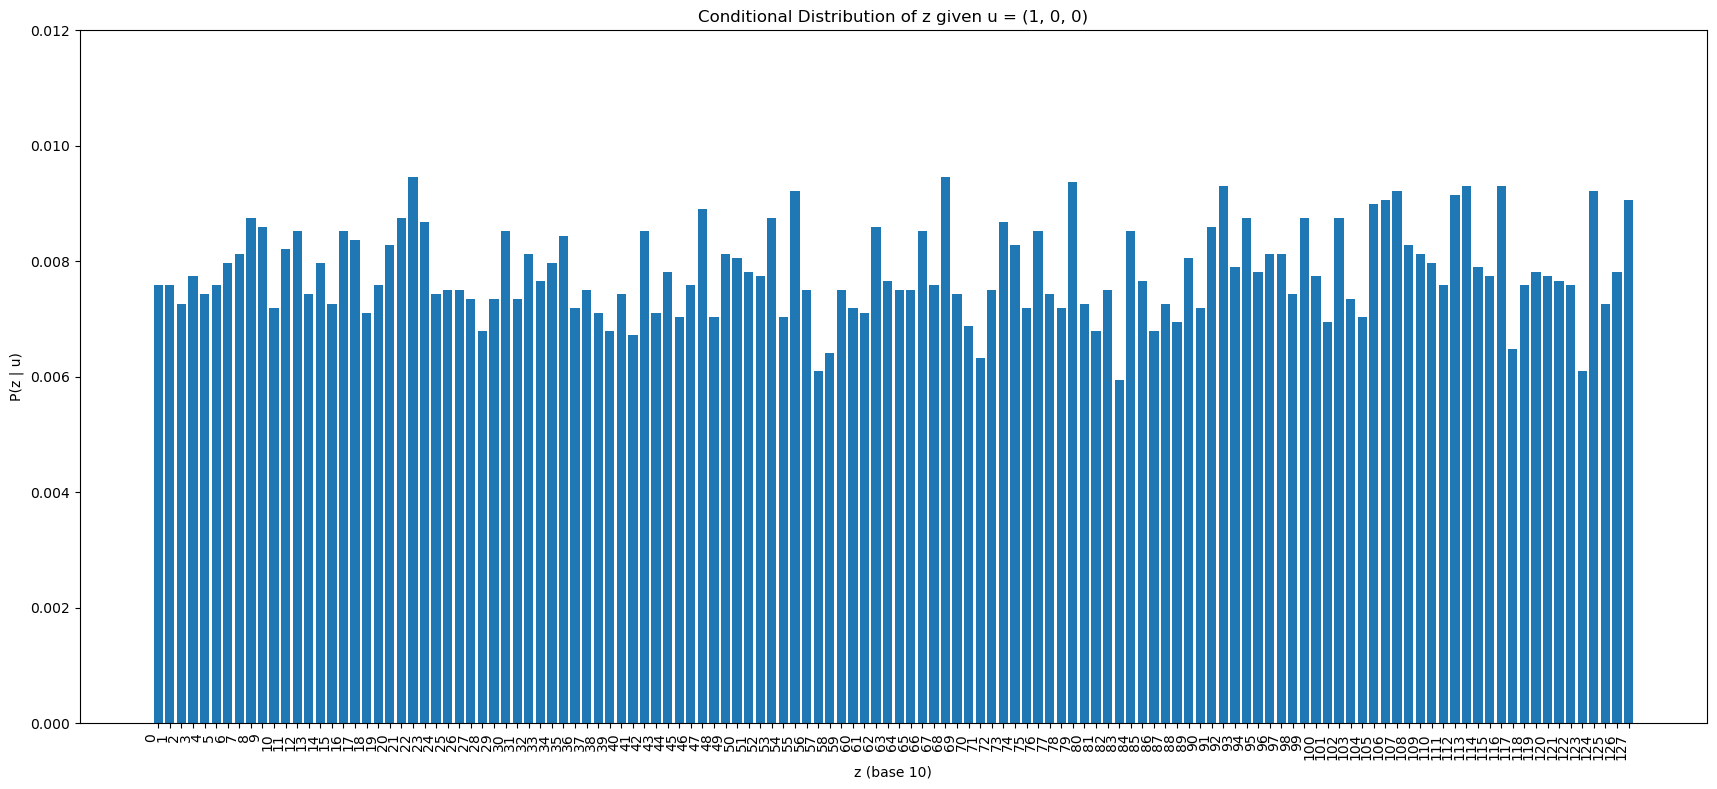

dist: {(0, 0, 0): {(0, 0, 0, 0, 0, 0, 0): 0.0071875, (0, 0, 0, 0, 0, 0, 1): 0.00828125, (0, 0, 0, 0, 0, 1, 0): 0.008515625, (0, 0, 0, 0, 0, 1, 1): 0.00828125, (0, 0, 0, 0, 1, 0, 0): 0.008125, (0, 0, 0, 0, 1, 0, 1): 0.007734375, (0, 0, 0, 0, 1, 1, 0): 0.00703125, (0, 0, 0, 0, 1, 1, 1): 0.006484375, (0, 0, 0, 1, 0, 0, 0): 0.006328125, (0, 0, 0, 1, 0, 0, 1): 0.007421875, (0, 0, 0, 1, 0, 1, 0): 0.007421875, (0, 0, 0, 1, 0, 1, 1): 0.0078125, (0, 0, 0, 1, 1, 0, 0): 0.0084375, (0, 0, 0, 1, 1, 0, 1): 0.00765625, (0, 0, 0, 1, 1, 1, 0): 0.007890625, (0, 0, 0, 1, 1, 1, 1): 0.006953125, (0, 0, 1, 0, 0, 0, 0): 0.007734375, (0, 0, 1, 0, 0, 0, 1): 0.0071875, (0, 0, 1, 0, 0, 1, 0): 0.00765625, (0, 0, 1, 0, 0, 1, 1): 0.0090625, (0, 0, 1, 0, 1, 0, 0): 0.006953125, (0, 0, 1, 0, 1, 0, 1): 0.009140625, (0, 0, 1, 0, 1, 1, 0): 0.00734375, (0, 0, 1, 0, 1, 1, 1): 0.00765625, (0, 0, 1, 1, 0, 0, 0): 0.008125, (0, 0, 1, 1, 0, 0, 1): 0.00875, (0, 0, 1, 1, 0, 1, 0): 0.00765625, (0, 0, 1, 1, 0, 1, 1): 0.007734375, (

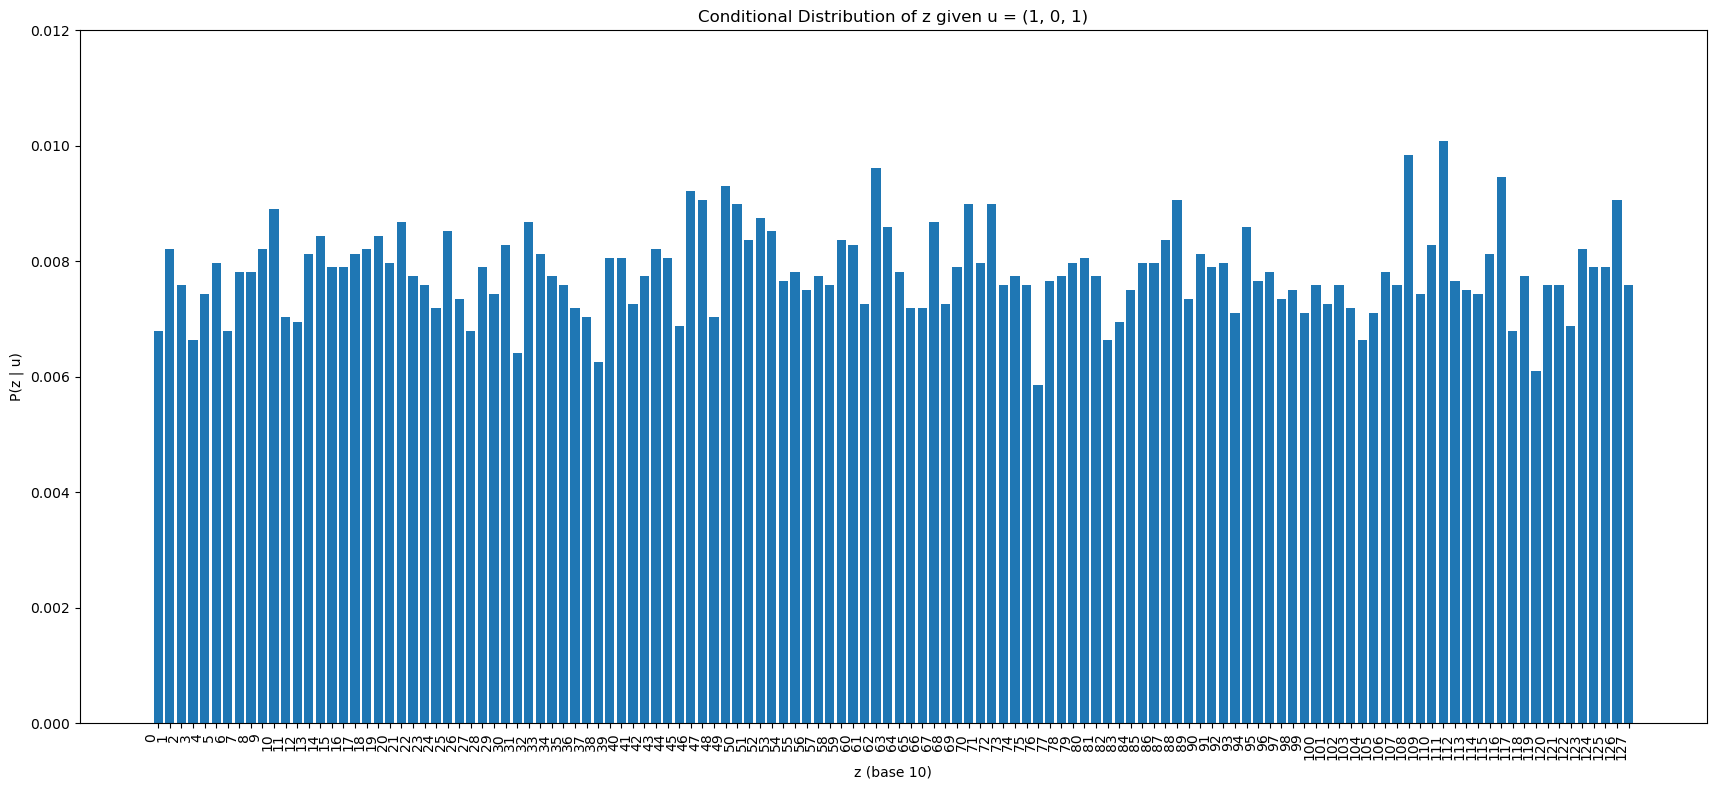

dist: {(0, 0, 0): {(0, 0, 0, 0, 0, 0, 0): 0.0071875, (0, 0, 0, 0, 0, 0, 1): 0.00828125, (0, 0, 0, 0, 0, 1, 0): 0.008515625, (0, 0, 0, 0, 0, 1, 1): 0.00828125, (0, 0, 0, 0, 1, 0, 0): 0.008125, (0, 0, 0, 0, 1, 0, 1): 0.007734375, (0, 0, 0, 0, 1, 1, 0): 0.00703125, (0, 0, 0, 0, 1, 1, 1): 0.006484375, (0, 0, 0, 1, 0, 0, 0): 0.006328125, (0, 0, 0, 1, 0, 0, 1): 0.007421875, (0, 0, 0, 1, 0, 1, 0): 0.007421875, (0, 0, 0, 1, 0, 1, 1): 0.0078125, (0, 0, 0, 1, 1, 0, 0): 0.0084375, (0, 0, 0, 1, 1, 0, 1): 0.00765625, (0, 0, 0, 1, 1, 1, 0): 0.007890625, (0, 0, 0, 1, 1, 1, 1): 0.006953125, (0, 0, 1, 0, 0, 0, 0): 0.007734375, (0, 0, 1, 0, 0, 0, 1): 0.0071875, (0, 0, 1, 0, 0, 1, 0): 0.00765625, (0, 0, 1, 0, 0, 1, 1): 0.0090625, (0, 0, 1, 0, 1, 0, 0): 0.006953125, (0, 0, 1, 0, 1, 0, 1): 0.009140625, (0, 0, 1, 0, 1, 1, 0): 0.00734375, (0, 0, 1, 0, 1, 1, 1): 0.00765625, (0, 0, 1, 1, 0, 0, 0): 0.008125, (0, 0, 1, 1, 0, 0, 1): 0.00875, (0, 0, 1, 1, 0, 1, 0): 0.00765625, (0, 0, 1, 1, 0, 1, 1): 0.007734375, (

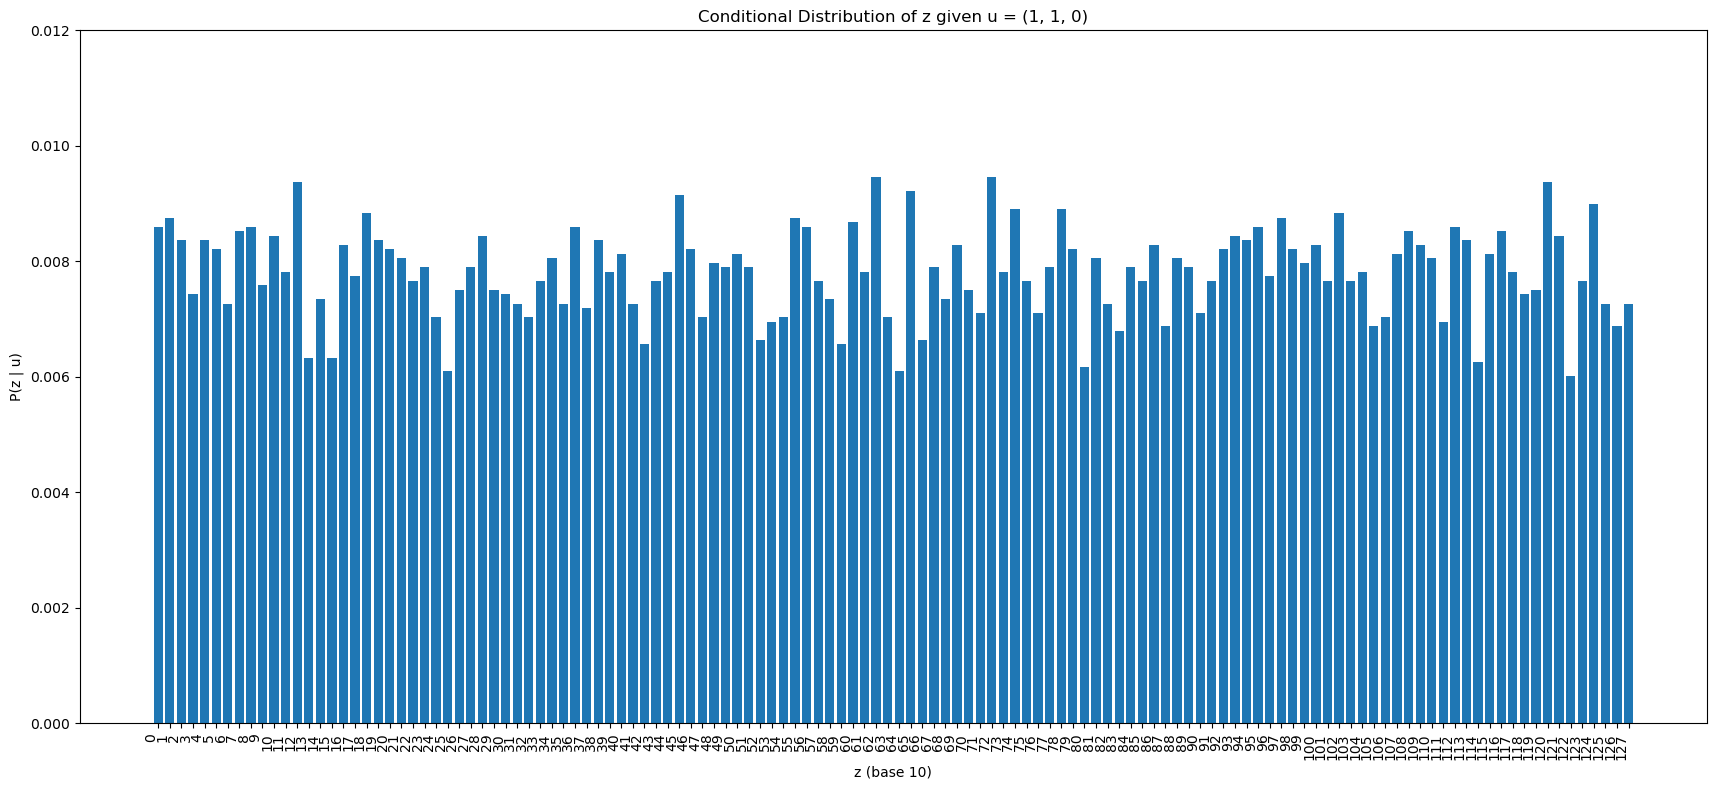

dist: {(0, 0, 0): {(0, 0, 0, 0, 0, 0, 0): 0.0071875, (0, 0, 0, 0, 0, 0, 1): 0.00828125, (0, 0, 0, 0, 0, 1, 0): 0.008515625, (0, 0, 0, 0, 0, 1, 1): 0.00828125, (0, 0, 0, 0, 1, 0, 0): 0.008125, (0, 0, 0, 0, 1, 0, 1): 0.007734375, (0, 0, 0, 0, 1, 1, 0): 0.00703125, (0, 0, 0, 0, 1, 1, 1): 0.006484375, (0, 0, 0, 1, 0, 0, 0): 0.006328125, (0, 0, 0, 1, 0, 0, 1): 0.007421875, (0, 0, 0, 1, 0, 1, 0): 0.007421875, (0, 0, 0, 1, 0, 1, 1): 0.0078125, (0, 0, 0, 1, 1, 0, 0): 0.0084375, (0, 0, 0, 1, 1, 0, 1): 0.00765625, (0, 0, 0, 1, 1, 1, 0): 0.007890625, (0, 0, 0, 1, 1, 1, 1): 0.006953125, (0, 0, 1, 0, 0, 0, 0): 0.007734375, (0, 0, 1, 0, 0, 0, 1): 0.0071875, (0, 0, 1, 0, 0, 1, 0): 0.00765625, (0, 0, 1, 0, 0, 1, 1): 0.0090625, (0, 0, 1, 0, 1, 0, 0): 0.006953125, (0, 0, 1, 0, 1, 0, 1): 0.009140625, (0, 0, 1, 0, 1, 1, 0): 0.00734375, (0, 0, 1, 0, 1, 1, 1): 0.00765625, (0, 0, 1, 1, 0, 0, 0): 0.008125, (0, 0, 1, 1, 0, 0, 1): 0.00875, (0, 0, 1, 1, 0, 1, 0): 0.00765625, (0, 0, 1, 1, 0, 1, 1): 0.007734375, (

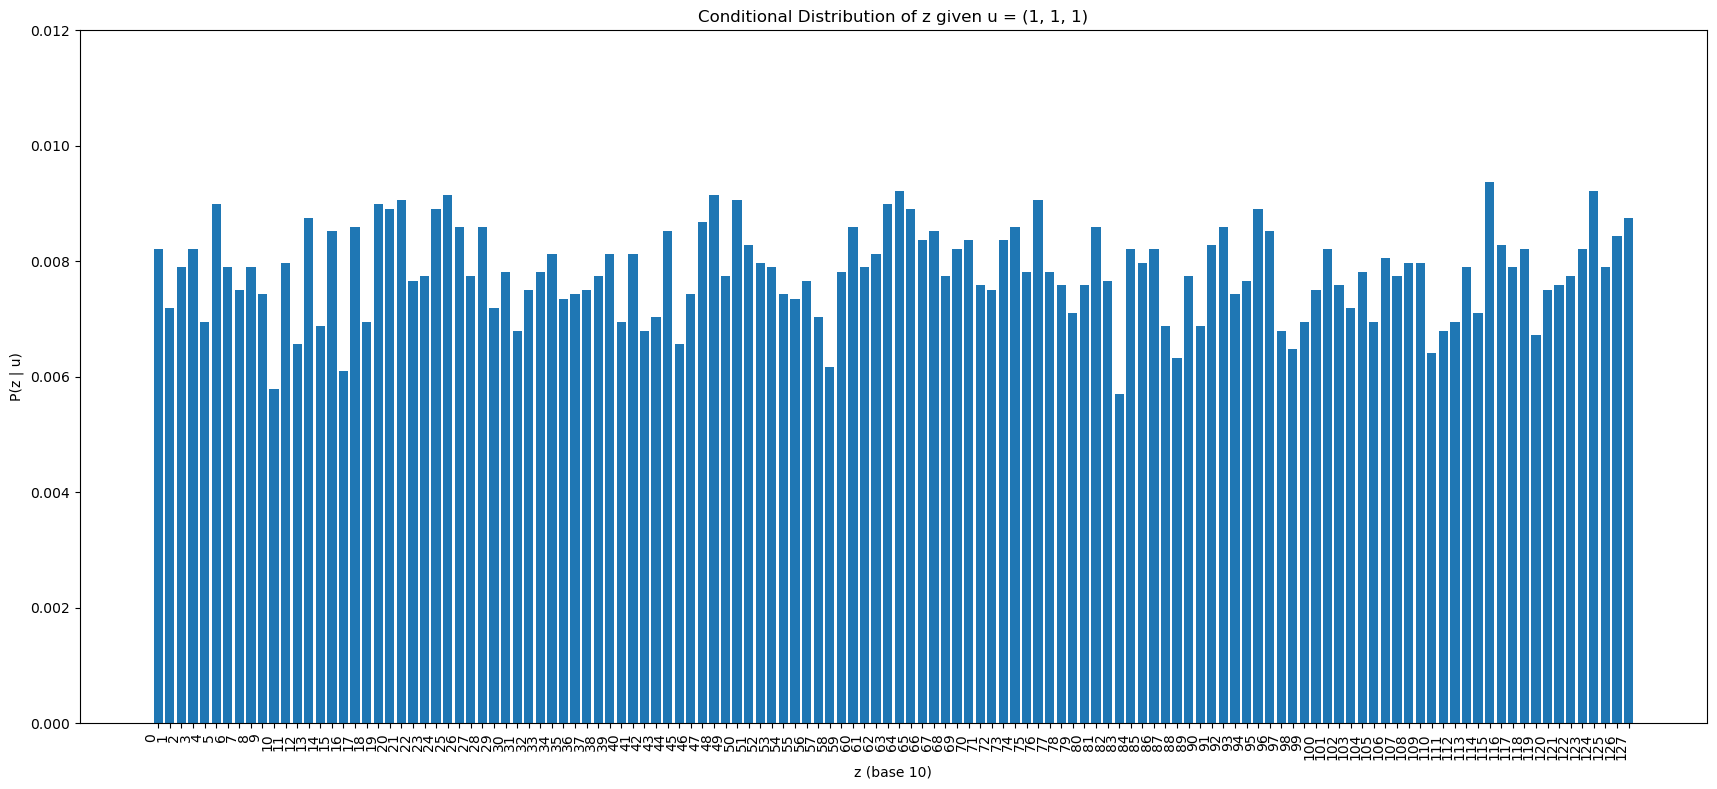

In [21]:
all_messages = [list(vector) for vector in itertools.product([0, 1], repeat=3)]
for u in all_messages:
    plot_conditional_distribution(dist, tuple(u))

In [ ]:
joint_prob = {}
for u, cond_prob in dist.items():
    for z, prob in cond_prob.items():
        joint_prob[(u, z)] = joint_prob * p_u

print("Probabilità congiunta P(u, z):")
for (u, z), joint in joint_prob.items():
    print(f"P(u = {u}, z = {z}) : {joint_prob:.6f}")

Probabilità congiunta P(u, z):
P(u = (0, 0, 0), z = (0, 0, 0, 0, 0, 0, 0)) : 0.000898
P(u = (0, 0, 0), z = (0, 0, 0, 0, 0, 0, 1)) : 0.001035
P(u = (0, 0, 0), z = (0, 0, 0, 0, 0, 1, 0)) : 0.001064
P(u = (0, 0, 0), z = (0, 0, 0, 0, 0, 1, 1)) : 0.001035
P(u = (0, 0, 0), z = (0, 0, 0, 0, 1, 0, 0)) : 0.001016
P(u = (0, 0, 0), z = (0, 0, 0, 0, 1, 0, 1)) : 0.000967
P(u = (0, 0, 0), z = (0, 0, 0, 0, 1, 1, 0)) : 0.000879
P(u = (0, 0, 0), z = (0, 0, 0, 0, 1, 1, 1)) : 0.000811
P(u = (0, 0, 0), z = (0, 0, 0, 1, 0, 0, 0)) : 0.000791
P(u = (0, 0, 0), z = (0, 0, 0, 1, 0, 0, 1)) : 0.000928
P(u = (0, 0, 0), z = (0, 0, 0, 1, 0, 1, 0)) : 0.000928
P(u = (0, 0, 0), z = (0, 0, 0, 1, 0, 1, 1)) : 0.000977
P(u = (0, 0, 0), z = (0, 0, 0, 1, 1, 0, 0)) : 0.001055
P(u = (0, 0, 0), z = (0, 0, 0, 1, 1, 0, 1)) : 0.000957
P(u = (0, 0, 0), z = (0, 0, 0, 1, 1, 1, 0)) : 0.000986
P(u = (0, 0, 0), z = (0, 0, 0, 1, 1, 1, 1)) : 0.000869
P(u = (0, 0, 0), z = (0, 0, 1, 0, 0, 0, 0)) : 0.000967
P(u = (0, 0, 0), z = (0, 0, 1, 0, 

In [ ]:
sum = 0
for (u, z), joint_prob in joint_prob.items():
    sum += joint_prob
print(f"Somma delle probabilità congiunte: {sum:.6f}")

Somma delle probabilità congiunte: 1.000000


In [26]:
def mutual_information(joint_prob, z_dist, u_dist):
    I = 0
    for (u, z), joint in joint_prob.items():
        I += joint * np.log2(joint / (u_dist[u] * z_dist[z]))
    return I

In [27]:
all_messages = [list(vector) for vector in itertools.product([0, 1], repeat=3)]
u_dist = {}
for u in all_messages:
    u_dist[tuple(u)] = 1/8

I_uz = mutual_information(joint_prob, z_dist, u_dist)
print(f"Informazione mutua I(U;Z): {I_uz:.6f} bit")

Informazione mutua I(U;Z): 0.006105 bit


# Answers
1. How many secret message bits per channel use (“transmitted word”) have you obtained with your scheme? **8**<br>
How many secret bits per binary digits? **3**

2. Is it possible to obtain 4 secret bits per channel use? **NO** <br>
If so, how should you change your encoder decoder? If not, why? <br>
**Answer:** Since it is upperbounded to
$$
\log_2 |\mathcal{Y}| - \log_2 N_{y|x} - (\log_2 |\mathcal{Z}| - \log_2 N_{z|x})
$$
that in our case is equal to **3**

3. Is it possible to obtain 2 secret bits per channel use? **NO** <br>
If so, how should you change your encoder decoder? If not, why?
**Answer:** Since it is lowerbounded to
$$
\log_2 |\mathcal{M}|
$$
that in our case is equal to **3**

4. One could consider evaluating the secrecy of this mechanism by cascading the eavesdropper channel with a decoder and measuring the resulting error rates.<br>
What do you expect the error rates should be?<br>
<space><space> We should achieve perfect secrecy and so the probability to guess u is $$\dfrac{1}{|\mathcal{Z}|} = \dfrac{1}{2^7} = 0,0078125$$<br>
Why resort to (more complicated) evaluating the mutual information?

#TASK 5

In [94]:
def binary_symmetric_channel(input,error):
    output=[]
    for bit in input:
        if random.random()<=error:
                output.append(bit ^1)
        else:
                output.append(bit)

    return output

def evaluate_BSC(error=0.1,iterations=10**5):
    x = [0,0,0,0,0,0,0]
    #error = 0.1
    count = 0

    for i in range(iterations):
        x_bsc = binary_symmetric_channel(x,error)
        for i in range(7):
            if x_bsc[i]==1:
                count+=1

    print(f"Mean error for {iterations} iterations is: {count/(iterations*len(x))}.\nWith {count} errors!")

#Testing task 5

In [95]:
epsilon = 0.1
delta = 0.3
print("Legitimate channel:")
evaluate_BSC(epsilon,iterations=10**6)
print("Eavesdropper: ")
evaluate_BSC(delta,iterations=10**6)

Legitimate channel:
Mean error for 1000000 iterations is: 0.09993114285714286.
With 699518 errors!
Eavesdropper: 
Mean error for 1000000 iterations is: 0.300112.
With 2100784 errors!


In [96]:
def connected_channels(error,u=[0,0,0,0,0,0,0]):
    x=random_binning_encoder(u)
    y=binary_symmetric_channel(x,error)
    return random_binning_decoder(y)

def connected_channels_simulations(error,u=[0,0,0,0,0,0,0],iterations=10**6):
    
    count=0
    for i in range(iterations):
        if [0,0,0,0,0,0,0] == connected_channels(error):
            count+=1
    return (f"The number of incorrect decoding is: {count} over {iterations} iterations")


In [97]:
connected_channels_simulations(epsilon)

'The number of incorrect decoding is: 0 over 1000000 iterations'

##TASK 6 